In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
# plt.style.use('bmh')

# from ipywidgets import widgets
# from IPython.display import display

%matplotlib inline  

In [7]:
data1min = pd.read_csv("2012-1min.csv", header=12)
data5min = pd.read_csv("2012-5min.csv", header=12)

In [58]:
test = data5min[data5min["Count BC"] == "5"]

In [59]:
len(test)

94378

In [63]:
(105408-94378)*5

55150

In [57]:
len(test)

105408

In [46]:
data5min.head()

,Date/Time[LST],Site Name,Flags[CO],Average CO[ppb],Min CO[ppb],Max CO[ppb],StDev CO[ppb],Median CO[ppb],Count CO,Flags[NO],...,StDev NEPH[Mm-1],Median NEPH[Mm-1],Count NEPH,Flags[BC],Average BC[ug/m3],Min BC [ug/m3],Max BC [ug/m3],StDev BC [ug/m3],Median BC [ug/m3],Count BC
0,1/1/12 0:00,JST,A/v0/v1,374.899,359.2357,386.8708,11.48795,376.7449,4,A/v0/v1,...,Null,Null,Null,A/v0/v1/v2,0.5747434,0.1986028,1.047896,0.3872676,0.5262373,4
1,1/1/12 0:05,JST,A/v0/v1,362.8132,343.1299,386.5153,16.3245,359.804,5,A/v0/v1,...,7.745387,50.97553,5,A/v0/v1/v2,1.774513,1.523905,1.902296,0.1537918,1.784644,5
2,1/1/12 0:10,JST,A/v0/v1,348.4381,317.2605,384.5443,26.74022,339.4034,5,A/v0/v1,...,12.73702,50.34055,5,A/v0/v1/v2,2.072346,1.423243,3.622488,0.9300339,1.612749,5
3,1/1/12 0:15,JST,A/v0/v1,319.8958,301.8157,338.0209,14.84213,322.2204,5,A/v0/v1,...,4.646767,32.45723,5,A/v0/v1/v2,3.093899,1.847709,4.410205,1.08867,2.944664,5
4,1/1/12 0:20,JST,A/v0/v1,347.394,320.0026,366.8376,19.78175,351.7625,5,A/v0/v1,...,0.5728888,28.60348,5,A/v0/v1/v2,1.425246,1.332696,1.557688,0.08203153,1.408168,5


In [8]:
data1min["datetime"] = pd.to_datetime(data1min["Date/Time[LST]"], format='%m/%d/%Y %H:%M')
data1min["nox"] = data1min["NO [ppb]"] + data1min["NO2 [ppb]"]
no = data1min[["datetime", "NO [ppb]"]]
no2 = data1min[["datetime", "NO2 [ppb]"]]
bc = data1min[["datetime", "BC [ug/m3]"]]
nox = data1min[["datetime", "NO [ppb]", "NO2 [ppb]"]]
# data1min = data1min.copy().rename(columns={"NO [ppb]": "no", "NO2 [ppb]": "no2", "BC [ug/m3]": "bc"})
# data["bc"] = data["pm"].replace("<", "0")

In [9]:
bc = bc.loc[bc["BC [ug/m3]"] != "Null"]

In [75]:
bc.head()

,datetime,BC [ug/m3]
1,2012-01-01 00:01:00,0.578
2,2012-01-01 00:02:00,0.2075862
3,2012-01-01 00:03:00,0.2973333
4,2012-01-01 00:04:00,0.804
5,2012-01-01 00:05:00,1.138276


In [76]:
dates = bc["datetime"].tolist()
ugm3 = bc["BC [ug/m3]"].tolist()

In [ ]:
bc = [(a, b) for a in dates for b in ugm3]

In [10]:
bc = [tuple(x) for x in bc.values]

In [11]:
bc[:3]

[(Timestamp('2012-01-01 00:01:00'), '0.578'),
 (Timestamp('2012-01-01 00:02:00'), '0.2075862'),
 (Timestamp('2012-01-01 00:03:00'), '0.2973333')]

In [44]:
data["Flags[CO]"].unique()

array(['Null', 'A/v0/v1'], dtype=object)

In [2]:
data =  pd.read_csv("PMdata.csv")

data["pm"] = data["pm"].replace("<", "0")
data["pm"] = data["pm"].replace(" ", "0")
# data = data[data.pm.notnull()]
data["pm"] = data["pm"].astype(float)

data["datetime"] = pd.to_datetime(data.datetime, format='%m/%d/%y %H:%M')

data.set_index('datetime', inplace=True)

data = data.ix["2014"]
data = data[~pd.isnull(data).any(axis=1)]

pm = data.pm.tolist()

In [38]:
data.reset_index(inplace=True)

In [98]:
pm = data.pm.tolist()

In [80]:
pm[8759]

5.4

In [70]:
random.randint(0,len(pm))

2576

In [75]:
pm.pop(2576)

3.2

In [189]:
np.mean(pm)

6.2765828571428566

In [305]:
len(pm)

8750

In [317]:
[x+1 for x in range(15)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [78]:
def rand(data, visits, lengths):
    mean = np.mean(data)
    results = []
    for v in visits:
        length_results = []
        for l in lengths:
            d = data.copy()
            vloop = v
            s = []
            while vloop > 0:
                r = random.randint(0,len(d)-1)
                if len(d) < r + l:
                    r = l - len(d)
                for i in range(l):
                    s.append(d.pop(r))
                vloop -= l
#             length_results.append(abs(np.mean(s) - mean))
            length_results.append((np.mean(s) - mean)**2)
        results.append(length_results)
    return results

In [79]:
visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
lengths = [x+1 for x in range(15)]
simulationResults = 0
n = 1000
for i in range(n):
    simulationResults = np.add(simulationResults,rand(pm, visits, lengths)) 
simulationRMSE = np.sqrt(np.divide(simulationResults,n))

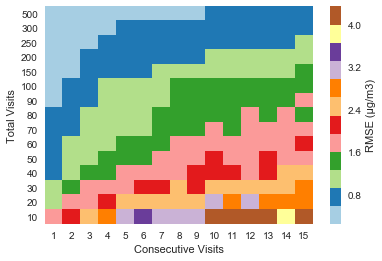

In [116]:
# ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(simulationRMSE, cmap="Paired", cbar_kws={'label': 'RMSE (μg/m3)'})
ax.invert_yaxis()
ax.set_xticklabels(lengths)
ax.set_yticklabels(list(reversed(visits)))
ax.set_xlabel('Consecutive Visits')
ax.set_ylabel('Total Visits')
for item in ax.get_yticklabels():
    item.set_rotation(0)

In [71]:
np.divide(simulationResults[0], 2)

array([[ 1.9   ,  4.3   ],
       [ 3.0594,  3.3375]])

In [70]:
simulationResults[0]

[[3.7999999999999998, 8.6000000000000014],
 [6.1188000000000002, 6.6749999999999998]]

In [66]:
simulationResults[1]

[[6.2000000000000002, 1.8999999999999999],
 [6.3973999999999993, 6.8287999999999993]]

[<matplotlib.text.Text at 0x115011400>, <matplotlib.text.Text at 0x114ffc6d8>]

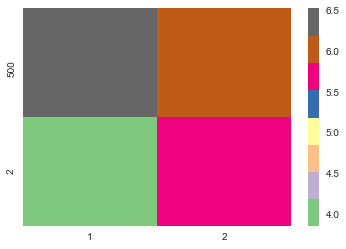

In [58]:
randTest = rand(pm, [2, 500], [1, 2])
# randTest = rand(pm, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500], [x+1 for x in range(15)])

# randTest, s = rand(pm, [1], [1000])
# df = pd.DataFrame(s)
# df.hist()

# sns.color_palette("Paired", as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
# sns.choose_diverging_palette()
# cmap = sns.color_palette(240, 10, n=9, cmap=True)
ax = sns.heatmap(randTest, cmap="Accent")
ax.invert_yaxis()
ax.set_xticklabels([1, 2])
ax.set_yticklabels([500, 2])

In [59]:
randTest

[[3.8499999999999996, 5.8499999999999996],
 [6.5226000000000006, 6.0839999999999996]]

In [ ]:
data.drop([0])

In [50]:
list(reversed([2, 500]))

[500, 2]

In [161]:
annualAvg = np.mean(data.pm)

In [162]:
annualAvg

6.276582857142844

In [9]:
len(data.pm)

8760

In [245]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:1000]).pm)

In [246]:
sampleAvg

6.113299999999991

In [15]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:5]).pm)
sampleAvgs = []
for i in range(1000):
    sampleAvgs.append(np.mean(data.take(np.random.permutation(len(data))[:5]).pm))

In [13]:
data.take(np.random.permutation(len(data))[:5]).pm

datetime
2014-10-27 09:00:00    10.5
2014-01-25 17:00:00     5.2
2014-12-19 13:00:00     1.7
2014-07-24 12:00:00     3.3
2014-03-27 07:00:00     1.5
Name: pm, dtype: float64

In [14]:
data.sample(n=5).pm

datetime
2014-01-01 06:00:00     8.2
2014-02-08 04:00:00     3.2
2014-07-29 08:00:00     4.2
2014-08-23 08:00:00    10.9
2014-04-18 16:00:00     3.1
Name: pm, dtype: float64

In [16]:
sampleAvgs2 = []
for i in range(1000):
    sampleAvgs2.append(np.mean(data.sample(n=5).pm))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10db51470>]], dtype=object)

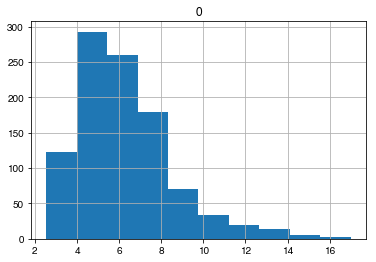

In [17]:
df2 = pd.DataFrame(sampleAvgs2)
df2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2e6128>]], dtype=object)

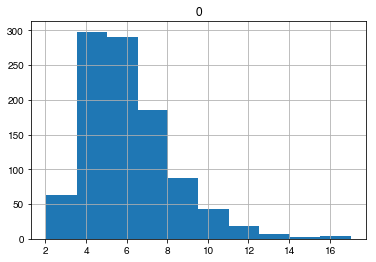

In [18]:
df = pd.DataFrame(sampleAvgs)
df.hist()

In [3]:
uniform_data = np.random.rand(10, 12)

In [4]:
uniform_data

array([[ 0.97802044,  0.50138008,  0.12037897,  0.02188043,  0.85461811,
         0.8217014 ,  0.13127829,  0.16098051,  0.38067068,  0.69237515,
         0.81130553,  0.73751703],
       [ 0.82066353,  0.1616369 ,  0.0882263 ,  0.52551445,  0.76683675,
         0.78055372,  0.3109151 ,  0.90991658,  0.74870347,  0.70478773,
         0.00833904,  0.23969491],
       [ 0.92101222,  0.12298682,  0.41809457,  0.78242087,  0.77436766,
         0.46443669,  0.16543257,  0.3019539 ,  0.49202781,  0.03155179,
         0.18614536,  0.90085184],
       [ 0.50421279,  0.78808387,  0.30945059,  0.66593542,  0.26140491,
         0.64641729,  0.93061068,  0.18703038,  0.77889126,  0.38466413,
         0.53435187,  0.39894999],
       [ 0.53275317,  0.52586636,  0.72418005,  0.02611774,  0.55613439,
         0.47662244,  0.33559134,  0.0167529 ,  0.26449919,  0.44152902,
         0.93267666,  0.70699767],
       [ 0.90854977,  0.26089401,  0.74878386,  0.72763483,  0.66120846,
         0.30294625,  